In [183]:
import pandas as pd
import numpy as np

In [184]:
df=pd.read_csv('train (1).csv',usecols=['LotFrontage','LotArea','SalePrice'])

In [185]:
df

,LotFrontage,LotArea,SalePrice
0,65.0,8450,208500
1,80.0,9600,181500
2,68.0,11250,223500
3,60.0,9550,140000
4,84.0,14260,250000
...,...,...,...
1455,62.0,7917,175000
1456,85.0,13175,210000
1457,66.0,9042,266500
1458,68.0,9717,142125


In [186]:
#Does that have any null value
df.isnull().sum()

LotFrontage    259
LotArea          0
SalePrice        0
dtype: int64

In [187]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [188]:
df.isnull().sum()

LotFrontage    0
LotArea        0
SalePrice      0
dtype: int64

In [189]:
#Train Test split

In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=42)

In [191]:
X_train

,LotFrontage,LotArea,SalePrice
254,70.0,8400,145000
1066,59.0,7837,178000
638,67.0,8777,85000
799,60.0,7200,175000
380,50.0,5000,127000
...,...,...,...
1095,78.0,9317,176432
1130,65.0,7804,135000
1294,60.0,8172,115000
860,55.0,7642,189950


In [192]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is a pandas DataFrame, and 'Runner Up' is the column to be used as the target variable.
X = df.drop('SalePrice', axis=1)  # Features
y = df['SalePrice']  # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking the shapes
X_train.shape, X_test.shape


((1168, 2), (292, 2))

In [193]:
#Feature Standardization #preprocessing

In [194]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
#Fitting is applied only on X_train,X-test data leak
scaler.fit(X_train)

#transofrm X_train,X_test
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



In [195]:
scaler.mean_

array([   69.69314313, 10589.67294521])

In [196]:
X_train

,LotFrontage,LotArea
618,90.000000,11694
870,60.000000,6600
92,80.000000,13360
817,70.049958,13265
302,118.000000,13704
...,...,...
763,82.000000,9430
835,60.000000,9600
1216,68.000000,8930
559,70.049958,3196


In [197]:
X_train_scaled

array([[ 0.9786782 ,  0.10321202],
       [-0.46715589, -0.37288066],
       [ 0.4967335 ,  0.25891881],
       ...,
       [-0.08160014, -0.15511546],
       [ 0.01719652, -0.69102346],
       [-0.56354483,  0.57762239]])

In [198]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [199]:
#non numerical data mnumerical cateogrical data
np.round(X_train_scaled.describe(),1)

,LotFrontage,LotArea
count,1168.0,1168.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.3,-0.9
25%,-0.5,-0.3
50%,0.0,-0.1
75%,0.4,0.1
max,11.7,19.1


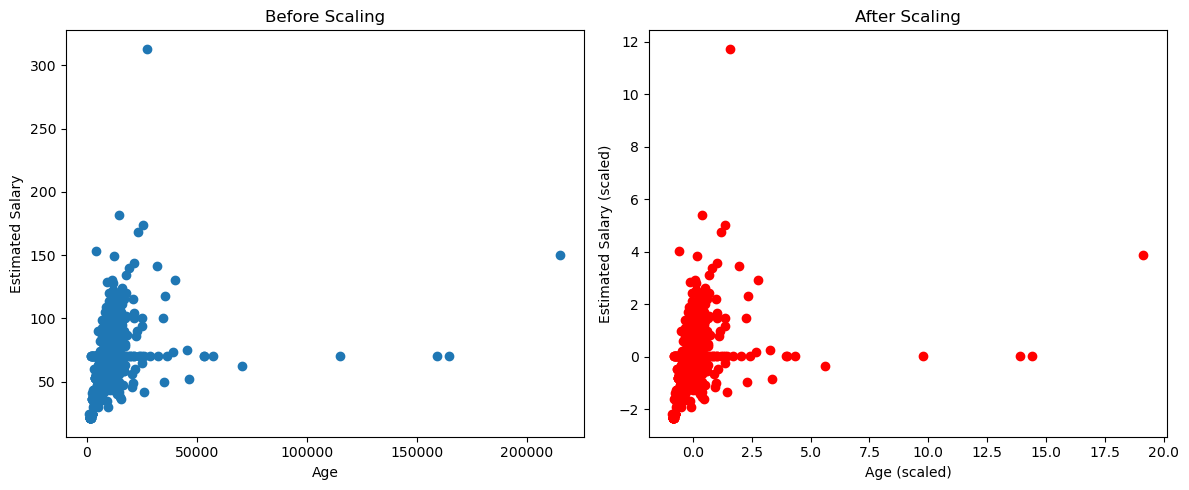

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.scatter(X_train['LotArea'], X_train['LotFrontage'])
ax1.set_title("Before Scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")

# After Scaling
ax2.scatter(X_train_scaled['LotArea'], X_train_scaled['LotFrontage'], color="red")
ax2.set_title("After Scaling")
ax2.set_xlabel("Age (scaled)")
ax2.set_ylabel("Estimated Salary (scaled)")

# Display the plots
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

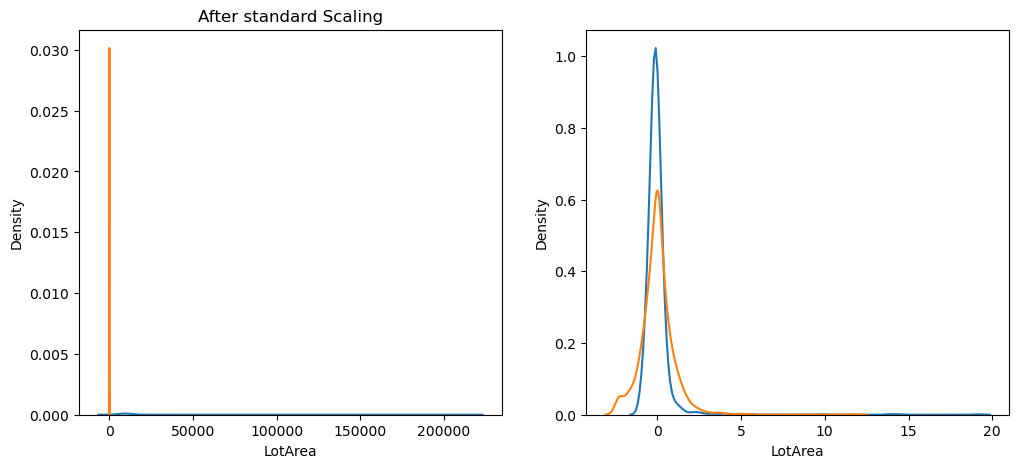

In [201]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))


ax1.set_title('Before Scaling')
sns.kdeplot(X_train['LotArea'],ax=ax1)
sns.kdeplot(X_train['LotFrontage'],ax=ax1)



#After scaling
ax1.set_title('After standard Scaling')
sns.kdeplot(X_train_scaled['LotArea'],ax=ax2)
sns.kdeplot(X_train_scaled['LotFrontage'],ax=ax2)
plt.show()
